# Задание 6
Седых Иван Дмитриевич БПМ181

In [6]:
import math

import numpy as np
import tqdm
from matplotlib import pyplot as plt
from scipy import interpolate, optimize


np.set_printoptions(suppress=True)
plt.style.use('ggplot')

In [2]:
with np.load('data_7_1.npz') as data :
    x1, y1 = data['x1'], data['y1']

[   0.  349.  698. 1047. 1396. 1746. 2095. 2444. 2793. 3142. 3492. 4190.
 4889. 5587. 6285. 6984. 7682. 8381. 9079. 9778.]
[-0.99       -0.98961838 -0.98749461 -0.98666501 -0.98641613 -0.98628339
 -0.98611747 -0.98610088 -0.98583541 -0.98583541 -0.98556994 -0.91289696
 -0.1005857  -0.09056413 -0.08454123 -0.08233449 -0.08079144 -0.07750622
 -0.07218019 -0.05817654]


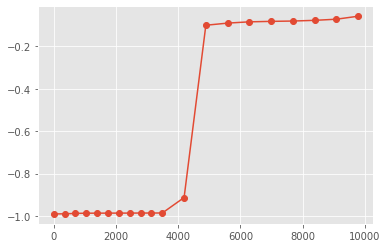

In [15]:
print(x1)
print(y1)
plt.plot(x1, y1, 'o-');

---
## Task 1

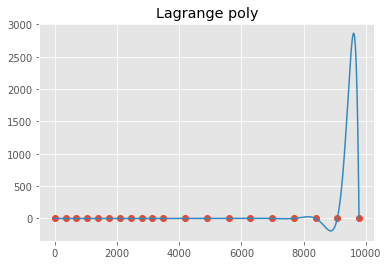

In [35]:
lagrange_poly = interpolate.lagrange(x1, y1)

xx = np.linspace(x1.min(), x1.max(), 1000)
plt.plot(x1, y1, 'o');
plt.plot(xx, lagrange_poly(xx));
plt.title('Lagrange poly');

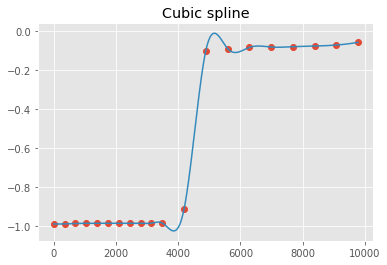

In [34]:
cubic_spline = interpolate.CubicSpline(x1, y1)

xx = np.linspace(x1.min(), x1.max(), 1000)
plt.plot(x1, y1, 'o');
plt.plot(xx, cubic_spline(xx));
plt.title('Cubic spline');

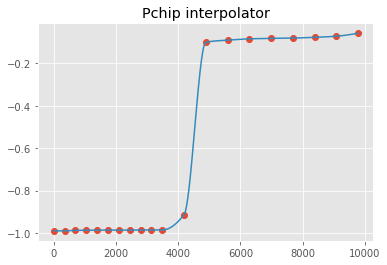

In [33]:
pchip = interpolate.PchipInterpolator(x1, y1)

xx = np.linspace(x1.min(), x1.max(), 1000)
plt.plot(x1, y1, 'o');
plt.plot(xx, pchip(xx));
plt.title('PCHIP interpolator');

---
## Task 2

/Users/sedyhivan/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/sedyhivan/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/sedyhivan/Library/Python/3.9/lib/python/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


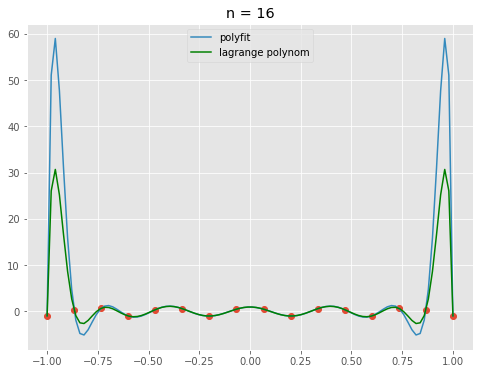

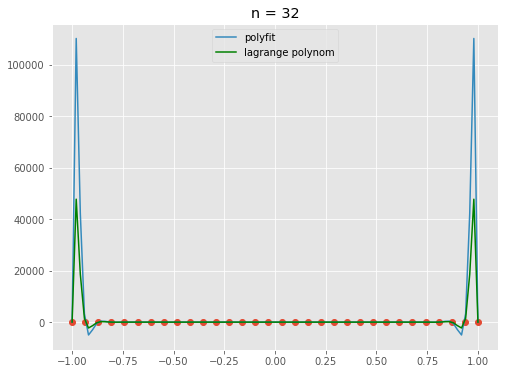

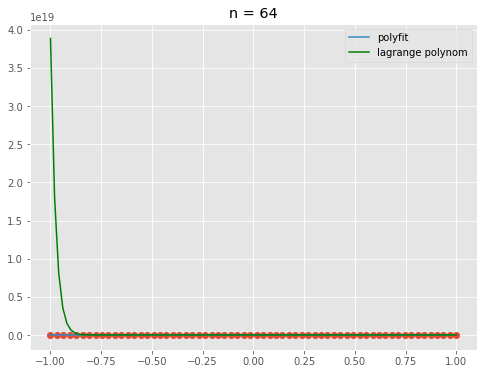

In [65]:
for n in [16, 32, 64]:

    x = np.linspace(-1, 1, n)
    y = np.cos(n * x)


    p = np.polyfit(x, y, deg=n)
    lagrange_poly = interpolate.lagrange(x, y)

    plt.figure(figsize=(8, 6));
    plt.title(f"n = {n}")
    plt.plot(x, y, 'o');
    xx = np.linspace(-1, 1, 100)
    plt.plot(xx, np.polyval(p, xx), label='polyfit');
    plt.plot(xx, lagrange_poly(xx), label='lagrange polynom', c='green');
    plt.legend();

---
## Task 3

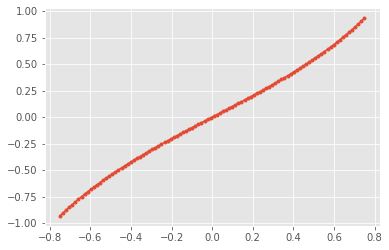

In [76]:
with np.load('data_7_1.npz') as data :
    x4, y4 = data['x4'], data['y4']

plt.plot(x4, y4, '.-');

In [95]:
def f1(x, p0, p1, p2, p3, p4, p5):
    return np.polyval([p0, p1, p2, p3, p4, p5], x)

def f2(x, p0, p1, p2, p3, q1, q2):
    return np.polyval([p0, p1, p2, p3], x) / (1 + q1 * x + q2 * x**2)


params_1, _ = optimize.curve_fit(f1, x4, y4)
params_2, _ = optimize.curve_fit(f2, x4, y4)

In [96]:
mse_f1 = np.mean((y4 - f1(x4, *params_1))**2)
mse_f2 = np.mean((y4 - f2(x4, *params_2))**2)
print(f"MSE f1 = {mse_f1}")
print(f"MSE f2 = {mse_f2}")

MSE f1 = 1.623748456103594e-08
MSE f2 = 1.4010819677796178e-12


Видим, что в терминах MSE **первая функция лучше**, хотя они обе в принципе молодцы.

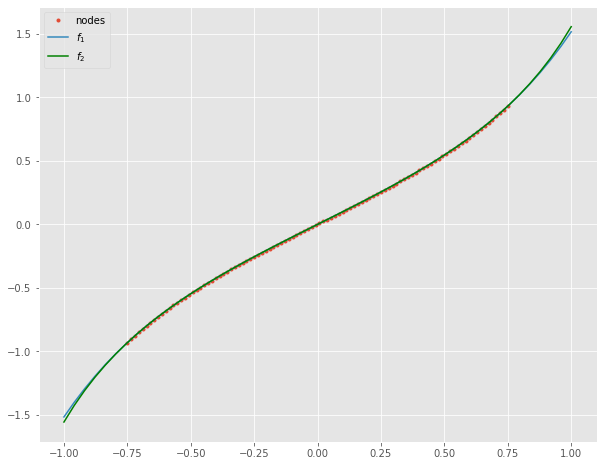

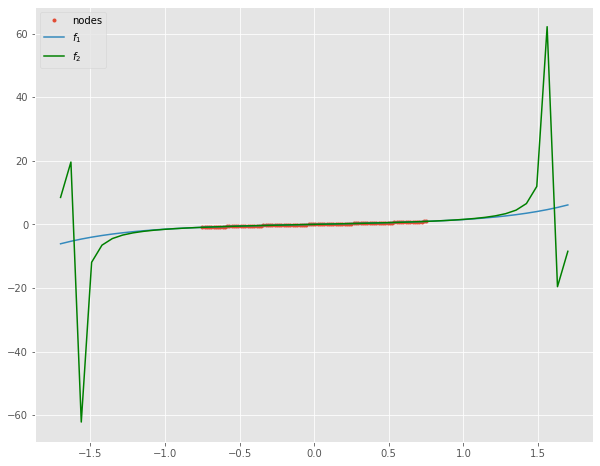

In [97]:
def make_plot(limit):
    plt.figure(figsize=(10, 8))
    plt.plot(x4, y4, '.', label='nodes');
    xx = np.linspace(-limit, limit)
    plt.plot(xx, f1(xx, *params_1), label='$f_1$');
    plt.plot(xx, f2(xx, *params_2), label='$f_2$', c='green');
    plt.legend();

make_plot(1);
make_plot(1.7);

Угадать истинную функцию я не могу.

---
## Task 4